In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_final=pd.read_csv('crop_recommendation_dataset.csv')

In [3]:
df_final.head()

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop
0,20.879744,82.002744,202.935536,6.502985,69.30,79.50000,94.4400,0.63,Loamy Soil,rice
1,21.770462,80.319644,226.655537,7.038096,72.02,141.82400,141.6978,1.40,Loamy Soil,rice
2,23.004459,82.320763,263.964248,7.633568,77.77,59.39000,81.8900,1.80,Peaty Soil,rice
3,26.491096,80.283629,242.864034,6.980401,78.65,147.45895,142.9430,1.43,Loamy Soil,rice
4,20.280071,81.604873,262.717340,7.628473,73.98,68.95000,95.7400,1.75,Peaty Soil,rice


In [4]:
df_final.shape

(3100, 10)

In [5]:
missing_value= df_final.isnull().sum()
print(missing_value)

Temperature    0
Humidity       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
dtype: int64


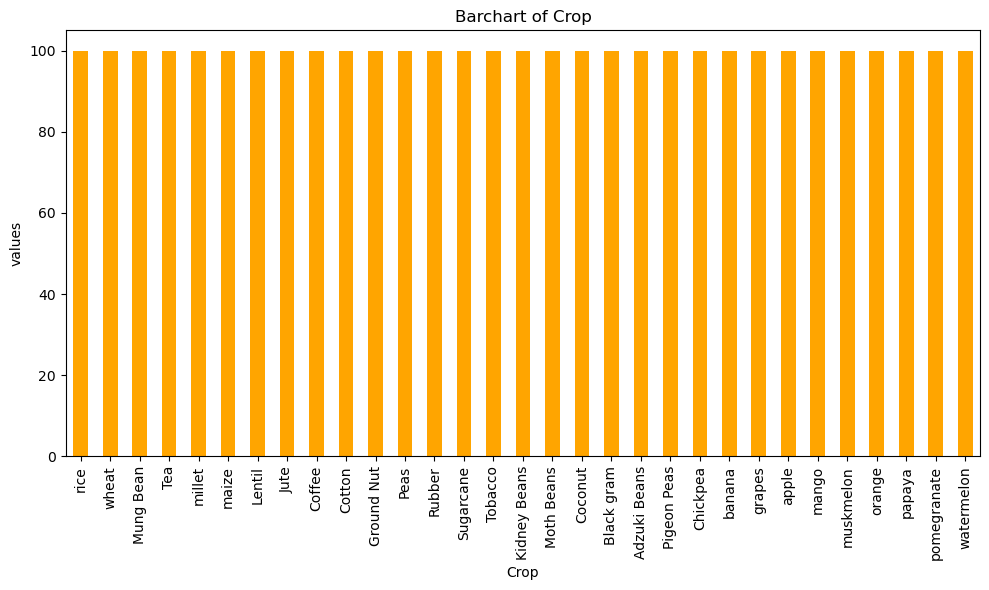

In [6]:
plt.figure(figsize=(10,6))
df_final['Crop'].value_counts().plot(kind='bar',color='orange')
plt.title('Barchart of Crop')
plt.ylabel('values')
plt.tight_layout()
plt.show()

In [7]:
df_final.describe()

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.105071,66.005004,110.212026,6.368656,61.236056,70.195388,69.553449,1.478071
std,7.545380,23.996884,63.894459,0.801479,8.391950,34.897833,29.464613,0.577143
min,9.944995,10.199589,20.757078,3.686162,50.580000,32.896500,41.841500,0.500000
25%,22.810495,55.366047,64.997024,5.896095,55.395000,45.255000,50.760000,0.980000
50%,26.087226,68.918967,97.057093,6.342518,59.265000,57.640000,56.895000,1.470000
75%,29.343867,84.446524,141.210784,6.839783,64.962500,82.212500,73.592500,1.980000
max,54.779935,99.646348,385.086491,9.407343,96.197500,149.099313,149.224250,2.500000


In [8]:
feature_names=df_final.columns.to_list()
feature_names

['Temperature',
 'Humidity',
 'Rainfall',
 'PH',
 'Nitrogen',
 'Phosphorous',
 'Potassium',
 'Carbon',
 'Soil',
 'Crop']

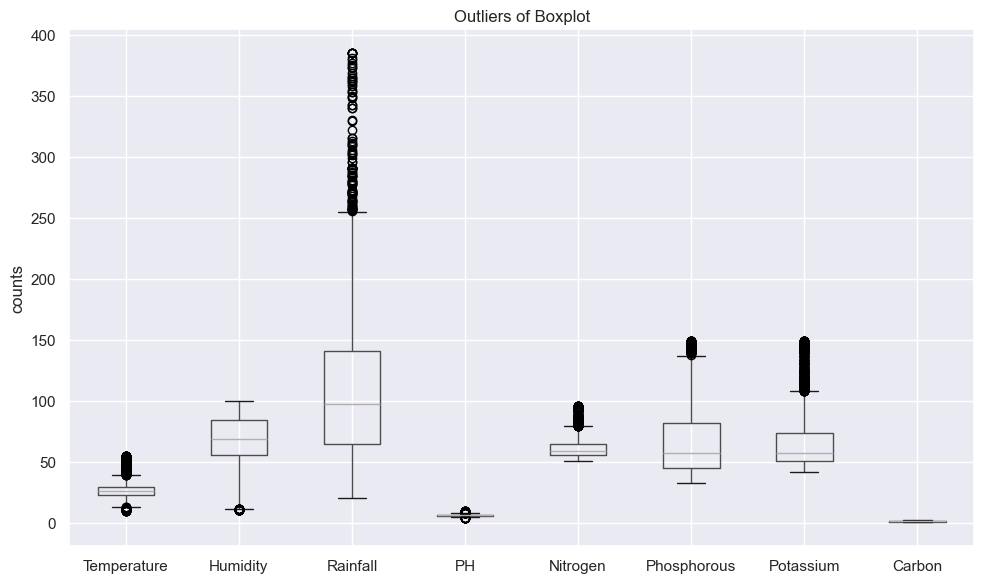

In [9]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
df_final.boxplot(column=['Temperature','Humidity','Rainfall','PH','Nitrogen','Phosphorous','Potassium','Carbon'])
plt.title('Outliers of Boxplot')
plt.ylabel('counts')
plt.tight_layout()
plt.show()

In [10]:
def remove_outliers(df,columns:None):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [11]:
columns=['Temperature','Humidity','Rainfall','PH','Nitrogen','Phosphorous','Potassium']

In [12]:
df_final=remove_outliers(df_final.copy(),columns)

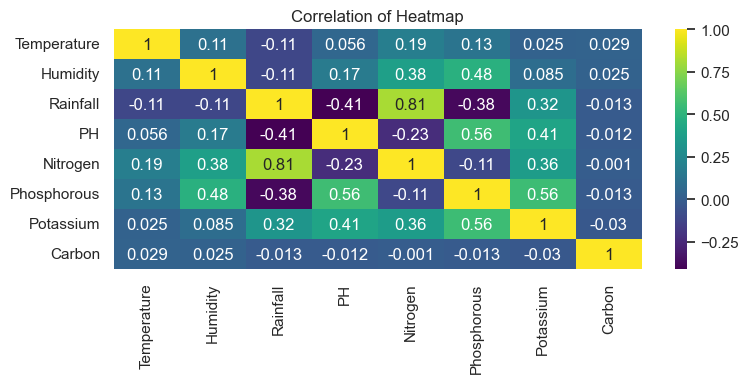

In [13]:
plt.figure(figsize=(8,4))
sns.heatmap(df_final.select_dtypes(include='number').corr(), annot=True, cmap="viridis")
plt.title("Correlation of Heatmap")
plt.tight_layout()
plt.show()

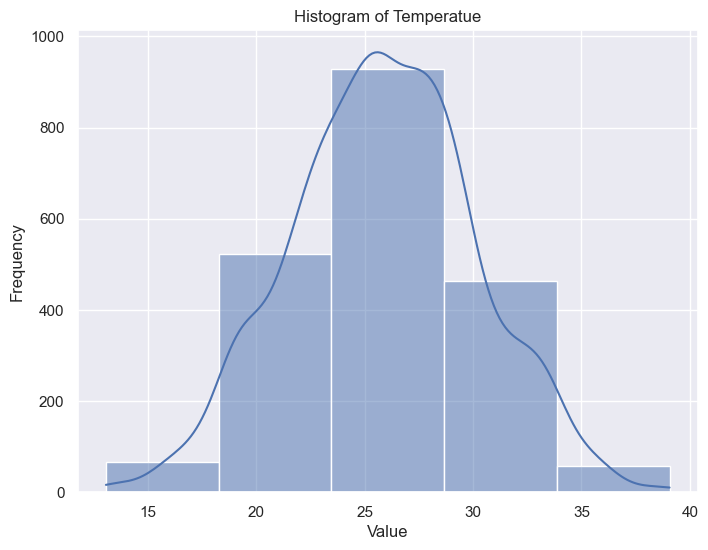

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(df_final['Temperature'], kde=True, bins=5)
plt.title('Histogram of Temperatue')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_final['Soil_labeled']=encoder.fit_transform(df_final['Soil'])

In [17]:
df_final=df_final.drop('Soil',axis=1)

In [18]:
df_final.head()

,Temperature,Humidity,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Crop,Soil_labeled
0,20.879744,82.002744,202.935536,6.502985,69.3000,79.50,94.44,0.63,rice,2
7,20.280071,82.894086,241.974195,5.718627,72.6000,49.41,65.18,2.32,rice,4
9,23.223974,83.033227,221.209196,6.336254,73.7000,67.53,84.44,2.37,rice,4
18,21.865252,80.283629,224.555017,5.953933,71.8700,53.00,68.62,1.10,rice,4
20,21.325042,80.474764,185.497473,6.442475,69.2805,73.30,84.36,0.79,rice,0


In [19]:
x = df_final.drop('Crop', axis = 1)
y = df_final['Crop']

In [20]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()

x_scaler = MMS.fit_transform(x)

x_scaler

array([[0.30074628, 0.78654625, 0.75007557, ..., 0.98280374, 0.065     ,
        0.5       ],
       [0.27768857, 0.79732978, 0.91080776, ..., 0.43588785, 0.91      ,
        1.        ],
       [0.39088313, 0.79901311, 0.82531292, ..., 0.79588785, 0.935     ,
        1.        ],
       ...,
       [0.52216901, 0.81912305, 0.11350128, ..., 0.11383178, 0.425     ,
        1.        ],
       [0.52917526, 0.80940764, 0.09558155, ..., 0.16934579, 0.09      ,
        0.        ],
       [0.52917526, 0.87620639, 0.1555981 , ..., 0.16261682, 0.495     ,
        0.        ]])

In [21]:
y_encoder=encoder.fit_transform(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_scaler, y_encoder, test_size=0.20, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [26]:
y_pred=rf_model.predict(X_test)

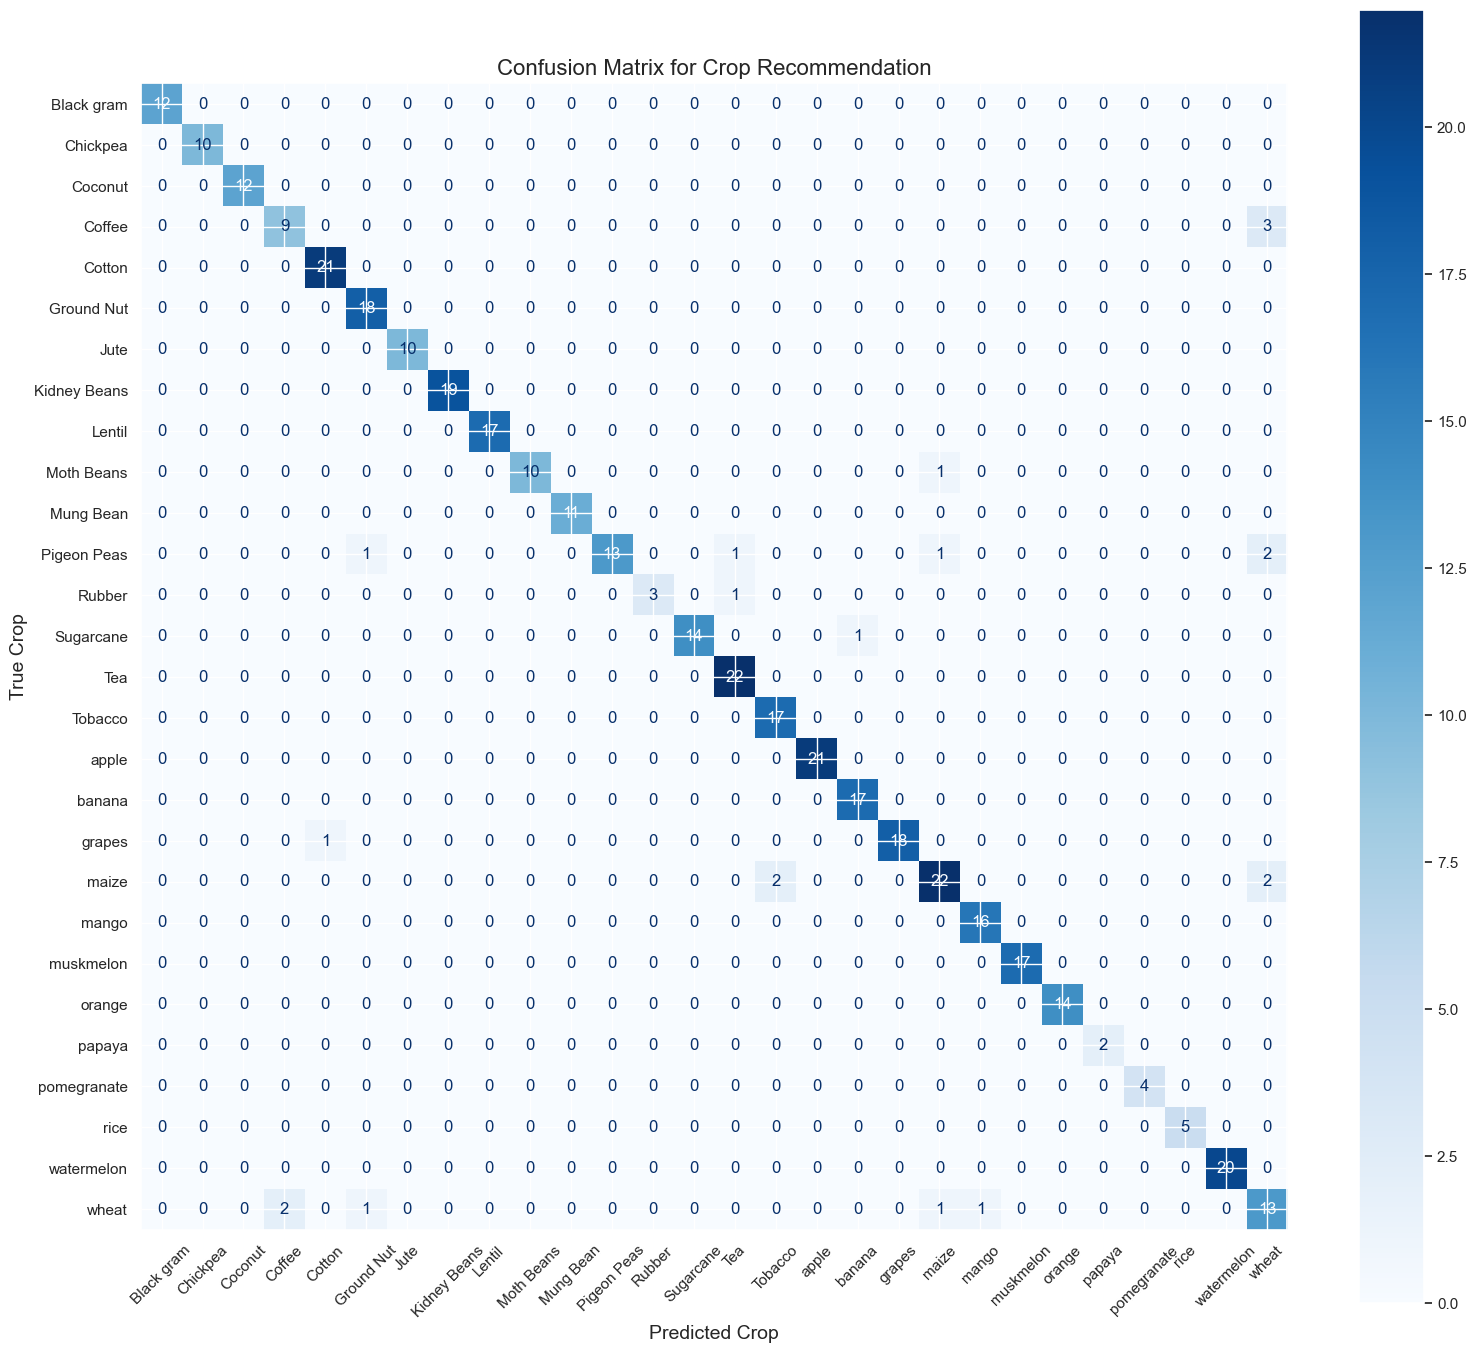

In [29]:

cm = confusion_matrix(y_test, y_pred)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
fig, ax = plt.subplots(figsize=(16, 14))  
disp.plot(cmap=plt.cm.Blues, colorbar=True, ax=ax, xticks_rotation=45)  
ax.set_xlabel('Predicted Crop', fontsize=14)
ax.set_ylabel('True Crop', fontsize=14)
ax.set_title('Confusion Matrix for Crop Recommendation', fontsize=16)
plt.tight_layout()
plt.show()

In [31]:
print('Classfication_Report:',classification_report(y_test, y_pred))

Classfication_Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12
           3       0.82      0.75      0.78        12
           4       0.95      1.00      0.98        21
           5       0.90      1.00      0.95        18
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        17
           9       1.00      0.91      0.95        11
          10       1.00      1.00      1.00        11
          11       1.00      0.72      0.84        18
          12       1.00      0.75      0.86         4
          13       1.00      0.93      0.97        15
          14       0.92      1.00      0.96        22
          15       0.89      1.00      0.94        17
          16       1.00      1.00      1.00        21
     

In [37]:
from sklearn.model_selection import StratifiedKFold
model = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
for train_index, test_index in skf.split(x_scaler, y_encoder):
    X_train, X_test = x_scaler[train_index], x_scaler[test_index]
    y_train, y_test = y_encoder[train_index], y_encoder[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

   
    acc = accuracy_score(y_test, y_pred)
    print(f"Fold {fold}: Accuracy = {acc:.3f}")
    fold += 1

Fold 1: Accuracy = 0.951
Fold 2: Accuracy = 0.939
Fold 3: Accuracy = 0.941
Fold 4: Accuracy = 0.939
Fold 5: Accuracy = 0.958


In [41]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
model.score(X_test,y_test)

0.9287469287469288